# Estadística Aplicada 2do Parcial

David Eduardo Gómez Marín, Matrícula: 1914352

Grupo: 041

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
prestamos = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [236]:
prestamos

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


## 1. Análisis exploratorio
a) Cuantas variables y cuantas observaciones tienen la base

El dataframe es de un tamaño de 1000 filas por 21 columnas, por lo que hay 1000 observaciones de 21 diferentes variables

b) Cuál es el monto promedio de los créditos otorgados por el banco

In [238]:
print('El monto promedio de cada prestamo otorgado por el banco es de $', prestamos['cantidad'].mean(), 'euros')

El monto promedio de cada prestamo otorgado por el banco es de $ 3271.258 euros


c) Cuál es el tiempo promedio que se tardaron en pagar el préstamo los 
que pagaron el préstamo en su totalidad

In [239]:
CreditoSiPagado = prestamos.query("credito_pagado == 1")
print('El promedio de meses que se tarda una persona en pagar totalmente su crédito es de', CreditoSiPagado['meses'].mean(), 'meses')

El promedio de meses que se tarda una persona en pagar totalmente su crédito es de 19.207142857142856 meses


d) Cuál es la tasa de interés promedio otorgada por el banco

In [240]:
print('La tasa sde interés promedio es de', prestamos['tasa_de_interes'].mean(),'%')

La tasa sde interés promedio es de 2.973 %


e) Cuál es el monto promedio y la tasa de interés promedio de los que ya 
pagaron

In [241]:
TasaPromSi = CreditoSiPagado['tasa_de_interes'].mean()
MontoPromSi = CreditoSiPagado['cantidad'].mean()

print('Monto promedio: $', MontoPromSi, 
      
      'Tasa promedio otorgada es de:',TasaPromSi,'%',
      
      'de las personas que ya pagaron')

Monto promedio: $ 2985.457142857143 Tasa promedio otorgada es de: 2.92 % de las personas que ya pagaron


f) Cuál es el monto promedio y la tasa de interés promedio de los que no 
han pagado

In [242]:
CreditoNoPagado = prestamos.query("credito_pagado == 0")
MontoPromNo = CreditoNoPagado['cantidad'].mean()
TasaPromNo = CreditoNoPagado['tasa_de_interes'].mean()

print('Monto promedio: $', MontoPromNo, 
      
      'Tasa promedio otorgada es de:',TasaPromNo,'%',
      
      'de las personas que no han pagado')


Monto promedio: $ 3938.1266666666666 Tasa promedio otorgada es de: 3.0966666666666667 % de las personas que no han pagado


## 2. Estime un modelo de Kaplan-meier 

In [243]:
from lifelines import KaplanMeierFitter
km1 = KaplanMeierFitter().fit(prestamos['meses'], prestamos['credito_pagado'])

In [244]:
km1.median_survival_time_

24.0

a) cuál es la mediana del tiempo y que significa

La mediana del tiempo de supervivencia es de 24 meses, loq ue quiere decir que pasados 24 meses, al menos la mitad de las personas ha pagado su crédito

b) es mayor/menor que el tiempo promedio del inciso 1c

Es mayor, ya que la mediana es de 24 meses mientras que el promedio que tarda en pagar su prestamo las personas que ya lo han pagado es de 19.207 meses

In [245]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

## 3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante,creciente, decreciente, o tipo log-normal respecto al tiempo

In [246]:
mexp = ExponentialFitter().fit(prestamos['meses'], prestamos['credito_pagado'])
mweibull = WeibullFitter().fit(prestamos['meses'], prestamos['credito_pagado'])
mLogNorm = LogNormalFitter().fit(prestamos['meses'], prestamos['credito_pagado'])

print('AIC Exponencial:', mexp.AIC_, 'AIC Weibull:', mweibull.AIC_, 'AIC LogNormal:', mLogNorm.AIC_)

AIC Exponencial: 6157.194686589735 AIC Weibull: 5900.981425445045 AIC LogNormal: 5813.747334550531


<Axes: >

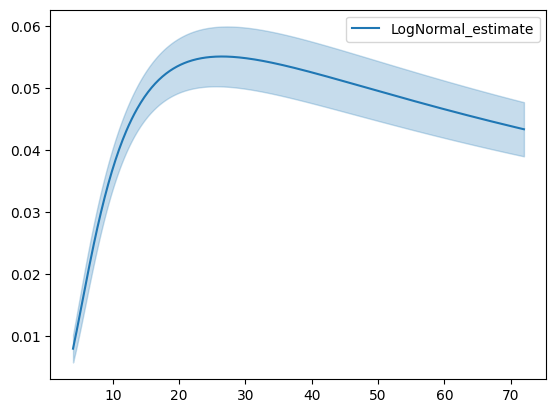

In [247]:
mLogNorm.plot_hazard()

Ya que el AIC del modelo Log Normal es el menor, se supone esta distribución para el tiempo de supervivencia, en la cual, el riesgo es creciente hasta un punto máximo en el cual empieza a decrecer.

## 4. Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que 
creas que afectan el riesgo del evento

Tomaré las variables

* historia_crediticia
* numero_creditos
* situacion_laboral
* dependientes_economicos

b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el 
riesgo del evento y por qué

Tomando en cuenta que el evento es que el crédito sea pagado, pienso que las variables influyen de la siguiente manera.

1. Tasa de interés. El aumento de esta variable disminuye el riesgo del evento, ya que, al tener una tasa de interés cada vez más alta, se hace más dificil el pago del crédito.

2. Cantidad. El aumento de esta variable igualmente disminuye el riesgo del evento, ya que, al tener una cantidad más grande, se tiene que pagar un monto cada vez mas grande y los intereses a pagar por una misma tasa de interés es más grande al aumentar el monto del préstamo, haciendo más difícil el pago.

3. Historia crediticia. Dependiendo que cual haya sido el comportamiento de la persona con otros créditos, sabremos si su comportamiento aumenta o disminuye el riesgo del pago. Si tiene buen comportamiento, aumenta el riesgo de que la persona pague su crédito, mientas que si tiene mal comportamiento crediticio, aumenta el riesgo de que suceda lo mismo con este crécito, es decir, que incumpla su pago.

4. Número de créditos. Mientras más créditos activos tenga la persona, más difícil le será pagar nuestro crédito, ya que, debe preocuparse cada vez por más creditos.

5. Situación laboral. Dependiendo de la situación laboral de cada persona, esta tendrá una mayor o menor capacidad de pago, dependiendo si su trabajo es estable o bien remunerado, tendrá mas riesgo de presentar el evento.

6. Dependientes económicos. Entre más dependientes económicos tenga la persona, tendrá menos riesgo de presentar el evento, ya que, además de continuar pagando nuestro crédito, necesita proveer a las personas que dependen económicamente de él. Aunque viendolo desde otro punto de vista, esto también puede aumentar el riesgo del evento, ya que al tener más dependientes económicos sería propenso a recibir ayudas gubernamentales tales como reducción o exención de impuestos, cupones de despensa, cheques de apoyo, etc. Lo que facilitaría destinar recursos para el pago del crédito.

c) Realiza las transformaciones adecuadas para utilizar las variables en un 
modelo de cox


In [248]:
DatosPCOX = prestamos[['meses','cantidad','tasa_de_interes','numero_creditos', 'situacion_laboral','historia_crediticia','dependientes_economicos','credito_pagado']]

In [249]:
DatosPCOX

,meses,cantidad,tasa_de_interes,numero_creditos,situacion_laboral,historia_crediticia,dependientes_economicos,credito_pagado
0,6,1169,4,2,gobierno,no_ha_pagado,1,1
1,48,5951,2,1,gobierno,pago_algun_credito,1,0
2,12,2096,2,1,obrero,no_ha_pagado,2,1
3,42,7882,2,1,gobierno,pago_algun_credito,2,1
4,24,4870,3,2,gobierno,pago_retrasado,2,0
...,...,...,...,...,...,...,...,...
995,12,1736,3,1,obrero,pago_algun_credito,1,1
996,30,3857,4,1,administrativo,pago_algun_credito,1,1
997,12,804,4,1,gobierno,pago_algun_credito,1,1
998,45,1845,4,1,gobierno,pago_algun_credito,1,0


In [250]:
dummiesHistorialC = pd.get_dummies(DatosPCOX['historia_crediticia'], prefix='Historial').astype(int)
dummiesSituaciónL = pd.get_dummies(DatosPCOX['situacion_laboral'], prefix='Laburo').astype(int)

In [251]:
dummiesHistorialC.head(2)

,Historial_no_ha_pagado,Historial_pago_algun_credito,Historial_pago_retrasado,Historial_pago_todos,Historial_sin_creditos
0,1,0,0,0,0
1,0,1,0,0,0


In [252]:
dummiesSituaciónL = dummiesSituaciónL[['Laburo_administrativo', 'Laburo_desempleado', 'Laburo_gobierno' ]]
#Dejamos fuera 'Laburo_obrero', por lo que habrá que comparar respecto a esa variable

dummiesHistorialC = dummiesHistorialC[['Historial_no_ha_pagado', 'Historial_pago_algun_credito', 'Historial_pago_retrasado', 'Historial_pago_todos']]
#Dejamos fuera 'Historial_sin_créditos', por lo que habrá que comparar respecto a esa variable

In [253]:
#Unimos las dummies al DF a usar para el modelo de COX
DatosPCOX = pd.concat([DatosPCOX, dummiesHistorialC], axis=1)
DatosPCOX = pd.concat([DatosPCOX, dummiesSituaciónL], axis=1)

In [254]:
DatosPCOX = DatosPCOX.drop('historia_crediticia', axis=1)
DatosPCOX = DatosPCOX.drop('situacion_laboral', axis=1)

In [255]:
DatosPCOX

,meses,cantidad,tasa_de_interes,numero_creditos,dependientes_economicos,credito_pagado,Historial_no_ha_pagado,Historial_pago_algun_credito,Historial_pago_retrasado,Historial_pago_todos,Laburo_administrativo,Laburo_desempleado,Laburo_gobierno
0,6,1169,4,2,1,1,1,0,0,0,0,0,1
1,48,5951,2,1,1,0,0,1,0,0,0,0,1
2,12,2096,2,1,2,1,1,0,0,0,0,0,0
3,42,7882,2,1,2,1,0,1,0,0,0,0,1
4,24,4870,3,2,2,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,1,1,1,0,1,0,0,0,0,0
996,30,3857,4,1,1,1,0,1,0,0,1,0,0
997,12,804,4,1,1,1,0,1,0,0,0,0,1
998,45,1845,4,1,1,0,0,1,0,0,0,0,1


In [256]:
DatosPCOX.isnull().sum()

meses                           0
cantidad                        0
tasa_de_interes                 0
numero_creditos                 0
dependientes_economicos         0
credito_pagado                  0
Historial_no_ha_pagado          0
Historial_pago_algun_credito    0
Historial_pago_retrasado        0
Historial_pago_todos            0
Laburo_administrativo           0
Laburo_desempleado              0
Laburo_gobierno                 0
dtype: int64

In [257]:
DatosPCOX.dtypes

meses                           int64
cantidad                        int64
tasa_de_interes                 int64
numero_creditos                 int64
dependientes_economicos         int64
credito_pagado                  int64
Historial_no_ha_pagado          int32
Historial_pago_algun_credito    int32
Historial_pago_retrasado        int32
Historial_pago_todos            int32
Laburo_administrativo           int32
Laburo_desempleado              int32
Laburo_gobierno                 int32
dtype: object

In [258]:
from lifelines import CoxPHFitter
import seaborn as sns

In [259]:
DatosPCOX

,meses,cantidad,tasa_de_interes,numero_creditos,dependientes_economicos,credito_pagado,Historial_no_ha_pagado,Historial_pago_algun_credito,Historial_pago_retrasado,Historial_pago_todos,Laburo_administrativo,Laburo_desempleado,Laburo_gobierno
0,6,1169,4,2,1,1,1,0,0,0,0,0,1
1,48,5951,2,1,1,0,0,1,0,0,0,0,1
2,12,2096,2,1,2,1,1,0,0,0,0,0,0
3,42,7882,2,1,2,1,0,1,0,0,0,0,1
4,24,4870,3,2,2,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,1,1,1,0,1,0,0,0,0,0
996,30,3857,4,1,1,1,0,1,0,0,1,0,0
997,12,804,4,1,1,1,0,1,0,0,0,0,1
998,45,1845,4,1,1,0,0,1,0,0,0,0,1


d) Estima un modelo de cox con las variables elegidas e interpreta los 
coeficientes.

In [260]:
CoxModelPrestamos = CoxPHFitter().fit(DatosPCOX, 'meses', 'credito_pagado')
CoxModelPrestamos.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4035.02
         time fit was run = 2023-10-07 04:13:40 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
cantidad                      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes               -0.42       0.65       0.04            -0.50            -0.35                 0.61                 0.70
numero_creditos                0.04       1.04       0.09            -0.13             0.21                 0.88                 1.23
dependientes_economicos        0.08       1.09       0.11            -0.12             0.29                 0.88                 1.34
Historial_no_ha_pagado         1.09       2.98       0.27             0.57             1.62                 1.76                 5.04
Historial_pago_algun_credito   0.66       1.94       0.27             0.13             1.19                 1.14                 3.30
Historial_pago_retrasado       0.51       1.66       0.29            -0.06             1.08                 0.94                 2.93
Historial_pago_todos           0.03       1.03       0.34            -0.64             0.71                 0.53                 2.03
Laburo_administrativo          0.03       1.03       0.14            -0.24             0.29                 0.79                 1.34
Laburo_desempleado            -0.48       0.62       0.28            -1.03             0.07                 0.36                 1.07
Laburo_gobierno               -0.26       0.77       0.10            -0.45            -0.07                 0.63                 0.93

                               cmp to      z      p   -log2(p)
covariate                                                     
cantidad                         0.00 -15.90 <0.005     186.58
tasa_de_interes                  0.00 -11.47 <0.005      98.78
numero_creditos                  0.00   0.49   0.63       0.68
dependientes_economicos          0.00   0.78   0.43       1.21
Historial_no_ha_pagado           0.00   4.07 <0.005      14.41
Historial_pago_algun_credito     0.00   2.44   0.01       6.09
Historial_pago_retrasado         0.00   1.75   0.08       3.63
Historial_pago_todos             0.00   0.10   0.92       0.12
Laburo_administrativo            0.00   0.20   0.84       0.25
Laburo_desempleado               0.00  -1.73   0.08       3.57
Laburo_gobierno                  0.00  -2.70   0.01       7.19
---
Concordance = 0.78
Partial AIC = 8092.05
log-likelihood ratio test = 468.72 on 11 df
-log2(p) of ll-ratio test = 308.37

In [261]:
CoxModelPrestamos.params_

covariate
cantidad                       -0.000389
tasa_de_interes                -0.423923
numero_creditos                 0.041481
dependientes_economicos         0.082708
Historial_no_ha_pagado          1.092686
Historial_pago_algun_credito    0.662049
Historial_pago_retrasado        0.506744
Historial_pago_todos            0.033969
Laburo_administrativo           0.027471
Laburo_desempleado             -0.481301
Laburo_gobierno                -0.263480
Name: coef, dtype: float64

In [262]:
CoxModelPrestamos.hazard_ratios_

covariate
cantidad                        0.999611
tasa_de_interes                 0.654475
numero_creditos                 1.042353
dependientes_economicos         1.086224
Historial_no_ha_pagado          2.982275
Historial_pago_algun_credito    1.938761
Historial_pago_retrasado        1.659878
Historial_pago_todos            1.034552
Laburo_administrativo           1.027852
Laburo_desempleado              0.617979
Laburo_gobierno                 0.768373
Name: exp(coef), dtype: float64

# Interpretación 

1. Cantidad. Entre más grande sea el monto del crédito, el riesgo de que la persona pague disminuye en un 0.0389%.

2. Tasa de interés. Entre más alta sea la tasa de interés del crédito, el riesgo de que la persona pague disminuye en un 35%.

3. El número de créditos y los dependientes económicos no influyen en el riesgo de pago de la persona.

4. Historial_no_ha_pagado. Tener historial de 'no ha pagado' aumenta en un 198% el riesgo de pago respecto a no tener historial crediticio.

5. Historial_pago_algun_credito. Tener un historial de 'pagó algún crédito' aumenta el riesgo de pago en un 94% respecto a no tener historial crediticio.


6. Las siguientes variables no influyen en el riesgo de pago de la persona


Historial_pago_retrasado

Historial_pago_todos

Laburo_administrativo

Laburo_desempleado

7. Laburo_gobierno. Trabajar en el gobierno disminuye el riesgo de que la persona pague en un 23% respecto a trabajar de obrero.


5. Con base en los cálculos realizados, redacta un comentario integral de por lo 
menos 250 palabras que resuma el análisis, reflexiones y recomendaciones 
sobre la política de otorgamiento de créditos en el Banco de la Ilusión.

El promedio general de crédito otorgado a las personas es de $3,271.258 euros. Comparando este monto general, con el monto promedio de las personas que ya han pagado su crédito, que es de $2,985.47, y con el monto promedio otorgado a las personas que no han pagado, que es de $3,938.12, vemos que el monto promedio de las personas que no han pagado es mayor al monto promedio general y mucho mayor al monto promedio de los que ya pagaron, mientras que el monto promedio de las personas que ya pagaron es mucho menor al promedio general.

Recomendación 1. Evitar otorgar créditos grandes ya que la gente puede presentar dificultades de pago al tener una deuda tan grande.

De igual forma, la tasa de interés promedio de las personas que no han pagado, que es de 3.097% es mayor a la tasa promedio general, de 2.973% y mucho mayor a la tasa de promedio de las personas que ya pagaron, que es de 2.92%. Lo que significa que una tasa de interés menor ayuda a que las personas paguen su crédito completamente.

Recomendación 2. Reducir en la medida de lo posible la tasa de interés, ya que el aumento de las tasas de interés aumenta el riesgo complementario, que es que las personas no paguen su crédito. 

Recomendación 3. Es recomendable elegir a personas que ya cuenten con experiencia crediticia, es decir, que ya cuenten con historial crediticio, ya que así se conocerá su comportamiento crediticio antes del otorgamiento del crédito, incluso, el simple hecho de tener historial crediticio (aunque sea uno de ‘no haber pagado’) aumenta el riesgo de que el evento (que el crédito sea pagado) aumente, respecto a no tener historial en lo absoluto.
